<a href="https://colab.research.google.com/github/STASYA00/IAAC2024_tutorials/blob/main/notebooks/04_model_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> - Stasja's notebook

### Data

⚠️ **NOTE:** Kaggle files have already been uploaded to the repo. You find them in folder `kaggle_data`´

If you for any reason need to download data from kaggle, instructions are in one of the [optional notebooks](./88_kaggle_data.ipynb) : <a href="https://colab.research.google.com/github/STASYA00/IAAC2024_tutorials/blob/main/notebooks/88_kaggle_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/STASYA00/IAAC2024_tutorials
%cd IAAC2024_tutorials/notebooks

In [2]:
# importing the necessary packages
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
metadata = pd.read_csv("../kaggle_data/tutorial_results/01_metadata.csv", index_col=0)
metadata.head()

,building_id,site_id,primaryspaceusage,sub_primaryspaceusage,sqm,timezone,electricity,hotwater,water,gas,industry,subindustry,heatingtype,yearbuilt,numberoffloors,occupants,rating
136,432,3,0,2,4703.0,1,0,0,0,0,0,2,11,NaN,5.0,NaN,1.0
137,416,3,0,2,499.3,1,0,1,0,0,0,2,7,NaN,4.0,NaN,0.0
138,436,3,0,2,9061.0,1,0,0,0,0,0,2,7,2005.0,10.0,NaN,2.0
139,441,3,0,3,7579.0,1,0,0,0,0,0,2,7,1913.0,5.0,NaN,0.0
140,442,3,0,3,5295.0,1,0,1,0,0,0,2,7,1953.0,6.0,NaN,1.0


In [6]:
target = "occupants"
X = metadata.drop(columns=[target]).loc[metadata[target].isna()==False]
Y = metadata[target].loc[metadata[target].isna()==False]
X_test = metadata.drop(columns=[target]).loc[metadata[target].isna()==True]
Y_test = metadata[target].loc[metadata[target].isna()==True]

In [ ]:
X.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

## 🏡 Buildings' Efficiency - First models

### Introduction

The easiest way to think about the models is pairing. We pair input to output.

There are many types of data (numbers, categories, images, 3D data, video, music, text ...). ML models allow us to "link" different data types. We can define what we have as "in" data and what we want to transform it into (or pair it with). 

Different models make different kinds of "pairing".

<img src="../.assets/io.png" height="800px"/>

We will start with the models that pair numerical and categorical data.

### 🫧 Linear Regression

#### 🪸 Visual

[![Linear Regression and Least Squares](https://img.youtube.com/vi/S0ptaAXNxBU?si=BzE5kEflCQWdenp6&t=35/0.jpg)](https://youtu.be/S0ptaAXNxBU?si=BzE5kEflCQWdenp6&t=35)

### Our data

<Axes: xlabel='sqm', ylabel='occupants'>

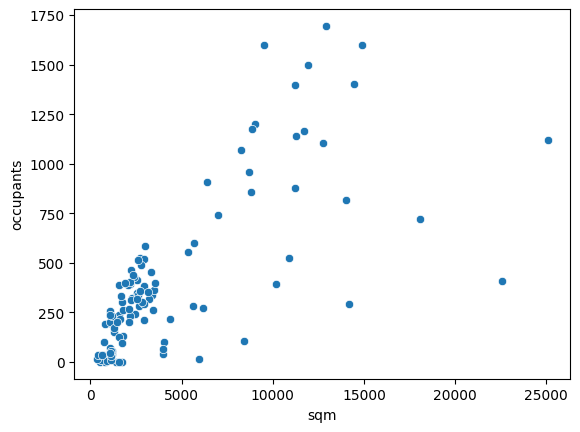

In [28]:
sns.scatterplot(x = X["sqm"], y = Y)

We can see that there is some dependency between these two variables. How should we draw the line?

In [ ]:
x_coords = [[0, 13000],[0, 17000],[0, 2500]]

fig, axes = plt.subplot(1, 3)
for i in range(3):
    sns.scatterplot(x = X["sqm"], y = Y, ax=axes[i])
    sns.lineplot(x=x_coords[i], y=[0, 1500], color=(1, 0,0 ), ax=axes[i])

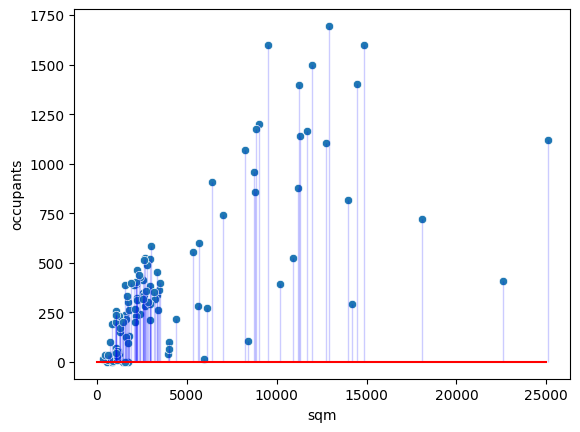

In [48]:
ax = sns.scatterplot(x = X["sqm"], y = Y)

sns.lineplot(x=[0,25000], y=[0, 0], color=(1, 0,0 ), ax=ax)
for x, y in zip(X["sqm"], Y):
    y_coord = 0 * x
    sns.lineplot(x=[x, x], y=[y_coord, y], color = (0,0,1))

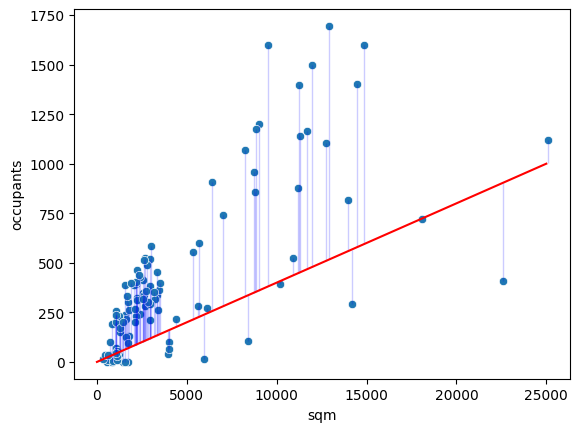

In [43]:
ax = sns.scatterplot(x = X["sqm"], y = Y)

sns.lineplot(x=[0,25000], y=[0, 1000], color=(1, 0,0 ), ax=ax)
for x, y in zip(X["sqm"], Y):
    y_coord = 1 / 25 * x
    sns.lineplot(x=[x, x], y=[y_coord, y], color = (0,0,1))

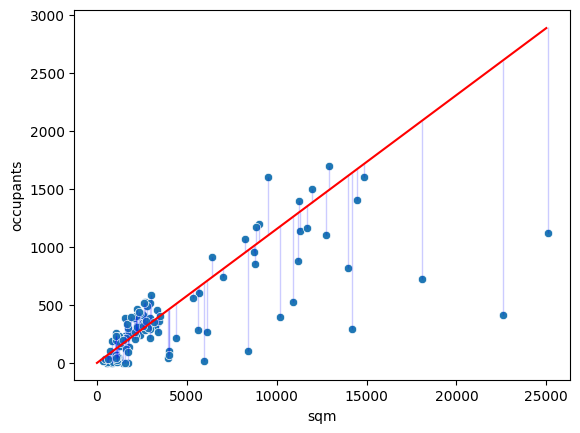

In [44]:
ax = sns.scatterplot(x = X["sqm"], y = Y)

sns.lineplot(x=[0,25000], y=[0, 25000 * 3 / 26], color=(1, 0,0 ), ax=ax)
for x, y in zip(X["sqm"], Y):
    y_coord = 3 / 26 * x
    sns.lineplot(x=[x, x], y=[y_coord, y], color = (0,0,1))

#### ⚙️ Code

In [5]:
from sklearn.linear_model import LinearRegression

In [51]:
features = ["sqm"]
reg = LinearRegression().fit(X[features], Y)
score = reg.score(X[features], Y)
res = reg.predict(X_test[features])
print(res.min(), res.max())
print("SCORE: {}".format(score))


160.56256765873155 1688.4200714603717
SCORE: 0.5235844512405314


In [55]:
reg.predict([[0]])

/home/sta/envs/capacity/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([138.59076377])

In [65]:
reg.predict([[1], [0]])

/home/sta/envs/capacity/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([138.65129215, 138.59076377])

#### 🎢 Result

/home/sta/envs/capacity/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


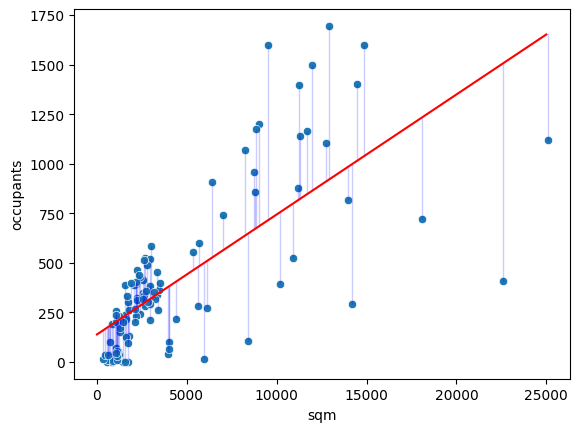

In [79]:

x = [0, 25000]
train_predict = reg.predict(X[features])

ax = sns.scatterplot(x = X["sqm"], y = Y)

sns.lineplot(x=x, y=reg.predict(np.array(x).reshape(-1,1)), color=(1, 0, 0 ), ax=ax)
for i, (x, y) in enumerate(zip(X["sqm"], Y)):
    y_coord = reg
    sns.lineplot(x=[x, x], y=[train_predict[i], y], color = (0,0,1))

<Axes: xlabel='numberoffloors', ylabel='occupants'>

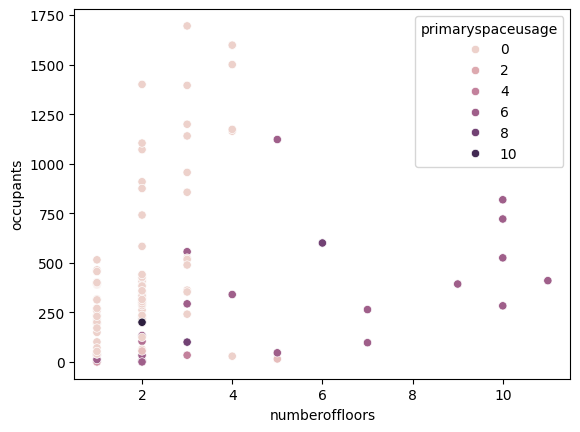

In [23]:
sns.scatterplot(x = X["numberoffloors"], y = Y,hue=X["primaryspaceusage"])

[Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

### 🫧 Decision Tree

#### ⚙️ Code

**Classification**

In [ ]:
from sklearn import tree

model = tree.DecisionTreeClassifier().fit(X, Y)


#### 🪸 Visual

In [ ]:
tree.plot_tree(model)

#### ⚙️ Code

**Regression**

In [ ]:
model = tree.DecisionTreeRegressor().fit(X, Y)

In [ ]:
model.predict(test_scaled)

### 🫧 Random Forest

#### 🪸 Visual

#### ⚙️ Code

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10).fit(X, Y)

### 🫧 Clustering

#### 🫧 KMEANS

##### 🪸 Visual

[![Clustering](https://www.imperva.com/blog/wp-content/uploads/sites/9/2017/07/k-means-clustering-on-spherical-data-1v2.png)](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

![](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

##### ⚙️ Code

#### 🫧 DBSCAN

##### 🪸 Visual

##### ⚙️ Code